
#### Lance Dominic C. Raquel 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
from sklearn import datasets

#### Part I – Importing the Dataset

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

#### Display the last 5 rows of the data

In [3]:
print(df.tail())

       0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica


#### Part II - select setosa and versicolor

In [4]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(df)

       0    1    2    3                4
0    5.1  3.5  1.4  0.2      Iris-setosa
1    4.9  3.0  1.4  0.2      Iris-setosa
2    4.7  3.2  1.3  0.2      Iris-setosa
3    4.6  3.1  1.5  0.2      Iris-setosa
4    5.0  3.6  1.4  0.2      Iris-setosa
5    5.4  3.9  1.7  0.4      Iris-setosa
6    4.6  3.4  1.4  0.3      Iris-setosa
7    5.0  3.4  1.5  0.2      Iris-setosa
8    4.4  2.9  1.4  0.2      Iris-setosa
9    4.9  3.1  1.5  0.1      Iris-setosa
10   5.4  3.7  1.5  0.2      Iris-setosa
11   4.8  3.4  1.6  0.2      Iris-setosa
12   4.8  3.0  1.4  0.1      Iris-setosa
13   4.3  3.0  1.1  0.1      Iris-setosa
14   5.8  4.0  1.2  0.2      Iris-setosa
15   5.7  4.4  1.5  0.4      Iris-setosa
16   5.4  3.9  1.3  0.4      Iris-setosa
17   5.1  3.5  1.4  0.3      Iris-setosa
18   5.7  3.8  1.7  0.3      Iris-setosa
19   5.1  3.8  1.5  0.3      Iris-setosa
20   5.4  3.4  1.7  0.2      Iris-setosa
21   5.1  3.7  1.5  0.4      Iris-setosa
22   4.6  3.6  1.0  0.2      Iris-setosa
23   5.1  3.3  1

In [5]:
setosa_versicolor_df = df[df[4].isin(['Iris-setosa', 'Iris-versicolor'])]

#### Plot petal length vs. sepal length features and classify the data as setosa or versicolor. Use a blue x mark for versicolor and red solid circle for setosa.

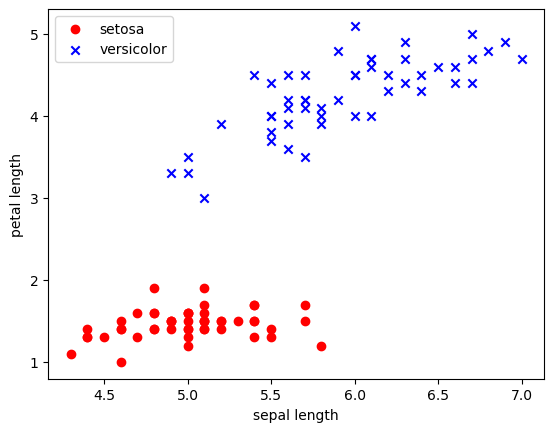

In [6]:
plt.scatter(setosa_versicolor_df.iloc[:50, 0], setosa_versicolor_df.iloc[:50, 2], color='red', marker='o', label='setosa')
plt.scatter(setosa_versicolor_df.iloc[50:100, 0], setosa_versicolor_df.iloc[50:100, 2], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend()
plt.show()

#### Part III – Plot the Decision Boundary 

#### Train your perceptron using the data to determine the boundary line between the two classes setosa and versicolor.

In [7]:
X = setosa_versicolor_df.iloc[:, [0, 2]].values
y = np.where(setosa_versicolor_df.iloc[:, 4] == 'Iris-setosa', -1, 1)

class Perceptron:
    def __init__(self, eta, n_iter):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)


perceptron = Perceptron(eta=0.1, n_iter=10)
perceptron.fit(X, y)

#### Include the boundary line in the plot in part 2.

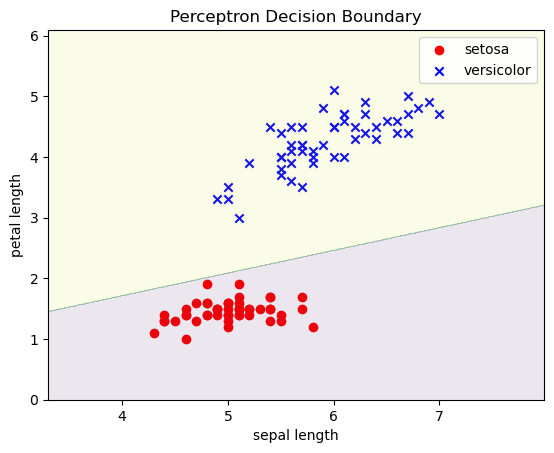

In [8]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend()

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = perceptron.predict(np.array([xx.ravel(), yy.ravel()]).T)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.1)
plt.title('Perceptron Decision Boundary')
plt.show()